# Continuous Control

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [2]:
!python -m pip install --upgrade pip

    100% |████████████████████████████████| 1.5MB 14.0MB/s ta 0:00:01
  Found existing installation: pip 18.1
    Uninstalling pip-18.1:
      Successfully uninstalled pip-18.1


In [3]:
!pip -q install ./python --use-feature=2020-resolver

The environments corresponding to both versions of the environment are already saved in the Workspace and can be accessed at the file paths provided below.  

Please select one of the two options below for loading the environment.

Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [1]:
from unityagents import UnityEnvironment
import numpy as np

# select this option to load version 1 (with a single agent) of the environment
# env = UnityEnvironment(file_name='/data/Reacher_One_Linux_NoVis/Reacher_One_Linux_NoVis.x86_64')

# select this option to load version 2 (with 20 agents) of the environment
# env = UnityEnvironment(file_name='/data/Reacher_Linux_NoVis/Reacher.x86_64')

# Run on local PC with Window 10 OS, version 2 (with 20 agents) of the environment
env = UnityEnvironment(file_name='./Reacher_Windows_x86_64/Reacher.exe')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_size -> 5.0
		goal_speed -> 1.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [2]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]
print(brain)

Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [3]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726624e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agents while they are training**, and you should set `train_mode=True` to restart the environment.

In [4]:
"""
env_info = env.reset(train_mode=True)[brain_name]      # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

"""

"\nenv_info = env.reset(train_mode=True)[brain_name]      # reset the environment    \nstates = env_info.vector_observations                  # get the current state (for each agent)\nscores = np.zeros(num_agents)                          # initialize the score (for each agent)\nwhile True:\n    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)\n    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1\n    env_info = env.step(actions)[brain_name]           # send all actions to tne environment\n    next_states = env_info.vector_observations         # get next state (for each agent)\n    rewards = env_info.rewards                         # get reward (for each agent)\n    dones = env_info.local_done                        # see if episode finished\n    scores += env_info.rewards                         # update the score (for each agent)\n    states = next_states                               # roll over states to next ti

When finished, you can close the environment.

In [5]:
#env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agents while they are training.  However, **_after training the agents_**, you can download the saved model weights to watch the agents on your own machine! 

DDPG Agent

* Critic network: 

$Q\left(s, a | \theta^{Q}\right)$ , Actor Network: $\mu\left(s | \theta^{\mu}\right)$

* Weights Critic: 

$\theta^{Q}$

* Weights Actor 

$\theta^{\mu}$

Update critic 

$y_{i}=r_{i}+\gamma Q^{\prime}\left(s_{i+1}, \mu^{\prime}\left(s_{i+1} | \theta^{\mu^{\prime}}\right) | \theta^{Q^{\prime}}\right)$

The Python Codes

* actions_next = self.actor_target(next_states):


* Q_targets_next = self.critic_target(next_states, actions_next)


Compute Q targets for current states (y_i):


* Q_targets = rewards + (gamma * Q_targets_next * (1 - dones))

The Loss function Mean Square Error

$L=\frac{1}{N} \sum_{i}\left(y_{i}-Q\left(s_{i}, a_{i} | \theta^{Q}\right)\right)^{2}$


The Python Codes

* critic_loss = F.mse_loss(Q_expected, Q_targets)

The Policy Gradient for the Critic and the Actor Network


$\nabla_{\theta^{\mu}} J \approx \mathbb{E}{s{t} \sim \rho^{\beta}}\left[\nabla_{\theta^{\mu}} Q\left.\left(s, a | \theta^{Q}\right)\right|{s=s{t}, a=\mu\left(s_{t} | \theta^{\mu}\right)}\right]$


$\nabla_{\theta^{\mu}} J \approx \frac{1}{N} \sum_{i} \nabla_{a} Q\left.\left(s, a | \theta^{Q}\right)\right|{s=s{i}, a=\mu\left(s_{i}\right)} \nabla_{\theta^{\mu}} \mu\left.\left(s | \theta^{\mu}\right)\right|{s{i}}$


The Python Codes

* actions_pred = self.actor_local(states):

* actor_loss = -self.critic_local(states, actions_pred).mean()

* critic_loss = F.mse_loss(Q_expected, Q_targets)

Minimize the loss of the Critic

*     self.critic_optimizer.zero_grad()
*     critic_loss.backward()
*     torch.nn.utils.clip_grad_norm_(self.critic_local.parameters(), 1)
*     self.critic_optimizer.step()

Update actor - Compute Actor loss
*     actions_pred = self.actor_local(states)
*     actor_loss = -self.critic_local(states, actions_pred).mean()
* 
Minimize the lossof the Actor
*     self.actor_optimizer.zero_grad()
*     actor_loss.backward()
*     self.actor_optimizer.step()

Update Target Networks
*     self.soft_update(self.critic_local, self.critic_target, TAU)
*     self.soft_update(self.actor_local, self.actor_target, TAU)



In [4]:
import gym
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

from ddpg_agent import Agent
agent = Agent(state_size, action_size, random_seed=20, num_agents = num_agents)
print(agent)

In [5]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
checkpoint_actor = 'checkpoint_actor_cuda.pth'
checkpoint_critic = 'checkpoint_critic_cuda.pth'
print(device)
print(torch.cuda.get_device_name(0))
print(torch.cuda.device_count())
print(torch.cuda.current_device())

cuda:0
GeForce GTX 1060
1
0


In [6]:
from collections import deque
from itertools import count
import torch
import matplotlib.pyplot as plt
%matplotlib inline

def ddpg(n_episodes=3000, max_t=1000):
    scores_deque = deque(maxlen=100)
    scores_all = []
    scores = []
    max_score = -np.Inf
    for i_episode in range(1, n_episodes+1):
        
        env_info = env.reset(train_mode=True)[brain_name]                
        states = env_info.vector_observations
        agent.reset()
        scores = np.zeros(num_agents)

        for t in count(): 
            actions = agent.act(states)
            env_info = env.step(actions)[brain_name]           # send all actions to tne environment
            next_states = env_info.vector_observations         # get next state (for each agent)
            rewards = env_info.rewards                         # get reward (for each agent)
            dones = env_info.local_done                        # see if episode finished
            scores += env_info.rewards                         # update the score (for each agent)
            for i in range(num_agents):
                agent.step(states[i], actions[i], rewards[i], next_states[i], dones[i])
            states = next_states
            #if np.any(dones): #Don't stop until at least one of the 20 agents terminates
            #    break 
            if np.all(dones): #Don't stop until all 20 agents terminates
                break 
                
        score = scores.mean()            
        scores_deque.append(score)
        scores_all.append(score)
        print('\rEpisode {}\tAverage Score: {:.2f}\tScore: {:.2f}'.format(i_episode, np.mean(scores_deque), score), end="")
        if i_episode % 100 == 0:
            if np.mean(scores_deque) >= 30:
                print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))
                torch.save(agent.actor_local.state_dict(), checkpoint_actor)
                torch.save(agent.critic_local.state_dict(), checkpoint_critic)
                break
            else:
                torch.save(agent.actor_local.state_dict(), checkpoint_actor)
                torch.save(agent.critic_local.state_dict(), checkpoint_critic)
                print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))
    return scores_all


In [ ]:
# Run the first 100 episodes from Udacity workspace. Because the loading time is too long compare to the local PC so I decided
# to stop the Udacity Workspace and use the local machine to run the rest.
scores = ddpg()

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

Episode 100	Average Score: 5.37	Score: 10.83


Episode 100	Average Score: 8.66	Score: 9.82


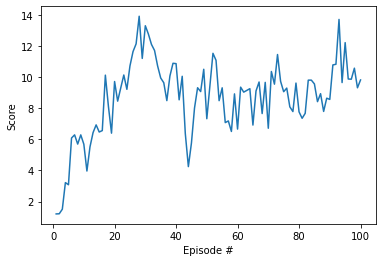

In [6]:
# Load the checkpoint of the actor and the critic after the first 100 episodes, and then continue the training 
# until the 200th episode was reached
train_mode = True
agent.actor_local.load_state_dict(torch.load('checkpoint_actor.pth',map_location=torch.device('cpu')))
agent.critic_local.load_state_dict(torch.load('checkpoint_critic.pth',map_location=torch.device('cpu')))
scores = ddpg(n_episodes=100)

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [ ]:
# Load the checkpoint of the actor and the critic after the first 200 episodes, and then continue the training 
# until the agent reached the average point 

train_mode = True
agent.actor_local.load_state_dict(torch.load(checkpoint_actor))
agent.critic_local.load_state_dict(torch.load(checkpoint_critic))
scores = ddpg()

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

Episode 100	Average Score: 5.80	Score: 11.40
Episode 200	Average Score: 14.24	Score: 17.25
Episode 300	Average Score: 15.40	Score: 12.66
Episode 400	Average Score: 12.27	Score: 13.97
Episode 452	Average Score: 12.78	Score: 11.27

In [5]:
agent.actor_local.load_state_dict(torch.load('checkpoint_actor_cuda.pth'))
agent.critic_local.load_state_dict(torch.load('checkpoint_critic_cuda.pth'))
env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    actions = agent.act(states) # select an action (for each agent)
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: 5.016499887872487


In [11]:
env.close()